## Potassium-40 Properties and Breit-Rabi plots
This script was converted from a Mathematica notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent.parent))

from amo.constants import *
from amo.breit_rabi import Ehf, FreqMHz

### Plotting Zeeman state energy

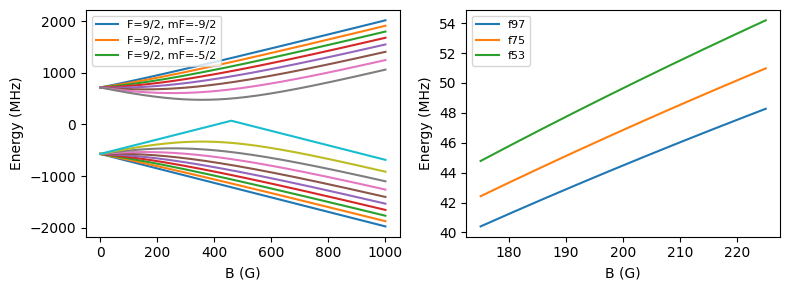

In [2]:
colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
B = np.linspace(0, 1000, 1000)
Bzoom = np.linspace(175, 225, 1000)

for j, F in enumerate([9/2, 7/2]):
    for i, mF in enumerate(np.arange(-F, F + 1)):
        if F == 9/2 and mF < -3/2:
            label = f"F={F*2:.0f}/2, mF={mF*2:.0f}/2"
            axs[0].plot(B, Ehf(B, F, mF) / h * 1e-6, colour_list[i], label=label)
        
        else:
            axs[0].plot(B, Ehf(B, F, mF) / h * 1e-6, colour_list[i])

for mF1, mF2 in [(-9/2, -7/2), (-7/2, -5/2), (-5/2, -3/2)]:
    label = f"f{np.abs(mF1*2):.0f}{np.abs(mF2*2):.0f}"
    axs[1].plot(Bzoom, FreqMHz(Bzoom, 9/2, mF1, 9/2, mF2), label=label)

axs[0].legend(fontsize=8, loc="upper left")
axs[1].legend(fontsize=8, loc="upper left")

for ax in axs:
    ax.set(ylabel="Energy (MHz)", xlabel="B (G)")

fig.tight_layout()
# fig.savefig("breit_rabi.png", dpi=300)
plt.show()